In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from statannotations.Annotator import Annotator

In [3]:
cartography_df = pd.read_csv('./agreeing-to-disagree-data-cartography.csv', index_col=0)
cartography_df.head()

,text_id,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label,pred,agreement_level,agreement_factor,confidence,variability,correctness,is_correct
0,1,No way Jose!!,0.842477,0.232004,0.995459,0.157523,0.232004,0.004541,0,0,A++,1.0,0.842477,0.232004,1.0,True
1,2,"Good god, what is the matter with people ?",0.671100,0.253321,0.961775,0.328900,0.253321,0.038225,0,0,A++,1.0,0.671100,0.253321,1.0,True
2,3,Um the Kurds are helping the ppl Of th...,0.685626,0.159763,0.784228,0.314374,0.159763,0.215772,0,0,A+,0.8,0.685626,0.159763,0.8,True
3,4,What is WRONG with these people?,0.981009,0.023864,0.997332,0.018991,0.023864,0.002668,0,0,A++,1.0,0.981009,0.023864,1.0,True
4,5,This earpiece too plus a wire on his sleeves...,0.945127,0.052518,0.991217,0.054873,0.052518,0.008783,0,0,A+,0.8,0.945127,0.052518,1.0,True


In [3]:
len(cartography_df['text_id'].unique())

6592

In [4]:
len(cartography_df)

6592

In [4]:
def round_agree_factor(agr_factor):
    if agr_factor <= 0.6:
        return 0.6
    elif agr_factor <= 0.8:
        return 0.8
    return 1.0

cartography_df['agreement_factor_rd'] = cartography_df['agreement_factor'].apply(lambda x: round_agree_factor(x))
cartography_df.head()

,text_id,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label,pred,agreement_level,agreement_factor,confidence,variability,correctness,is_correct,agreement_factor_rd
0,1,No way Jose!!,0.842477,0.232004,0.995459,0.157523,0.232004,0.004541,0,0,A++,1.0,0.842477,0.232004,1.0,True,1.0
1,2,"Good god, what is the matter with people ?",0.671100,0.253321,0.961775,0.328900,0.253321,0.038225,0,0,A++,1.0,0.671100,0.253321,1.0,True,1.0
2,3,Um the Kurds are helping the ppl Of th...,0.685626,0.159763,0.784228,0.314374,0.159763,0.215772,0,0,A+,0.8,0.685626,0.159763,0.8,True,0.8
3,4,What is WRONG with these people?,0.981009,0.023864,0.997332,0.018991,0.023864,0.002668,0,0,A++,1.0,0.981009,0.023864,1.0,True,1.0
4,5,This earpiece too plus a wire on his sleeves...,0.945127,0.052518,0.991217,0.054873,0.052518,0.008783,0,0,A+,0.8,0.945127,0.052518,1.0,True,0.8


In [42]:
len(cartography_df)

6592

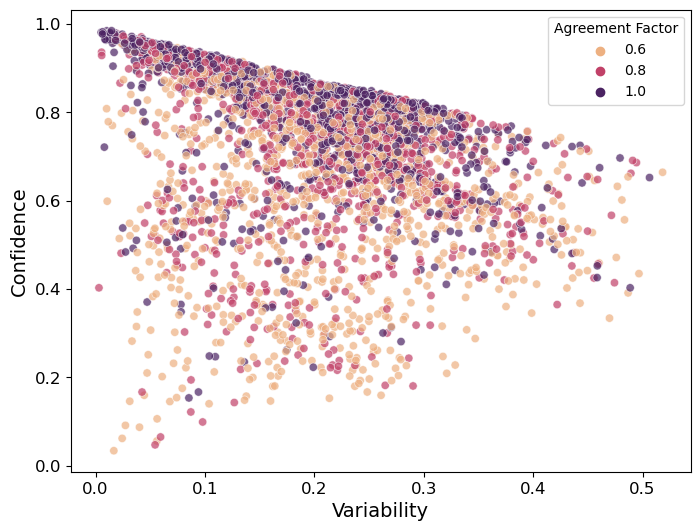

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_df, x="variability", y="confidence", hue='agreement_factor', palette='flare', alpha=0.7)

plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.legend(title='Agreement Factor')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/conf_vs_var_color_agreement_factor.png", dpi=600, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.6 vs. 0.8: Mann-Whitney-Wilcoxon test two-sided, P_val:8.282e-66 U_stat=1.236e+06
0.8 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.220e-112 U_stat=1.646e+06
0.6 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:1.638e-304 U_stat=9.348e+05


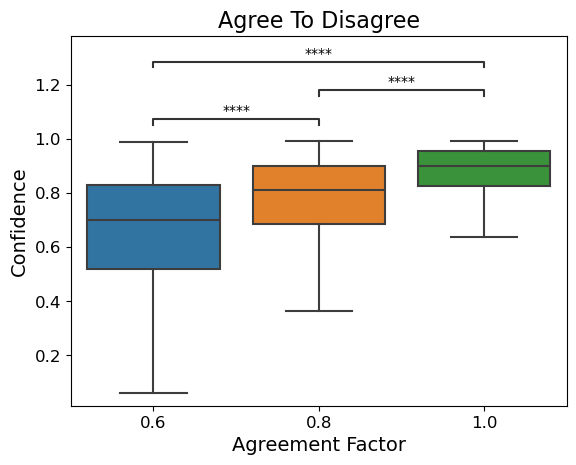

In [43]:
ax = sns.boxplot(data=cartography_df, x="agreement_factor", y="confidence", showfliers=False)

pairs=[(0.6, 0.8), (0.8, 1.0), (0.6, 1.0)]

annotator = Annotator(ax, pairs, data=cartography_df, x="agreement_factor", y="confidence")
annotator.configure(test='Mann-Whitney', text_format='star')
annotator.apply_and_annotate()

plt.title("Agree To Disagree", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/agr_factor_vs_conf.png", dpi=600, bbox_inches='tight')



In [44]:
cartography_df['label_text'] = cartography_df['label'].map({0: 'not offensive', 1: 'offensive'})

In [45]:
len(cartography_df)

6592

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.6_0 vs. 1.0_0: Mann-Whitney-Wilcoxon test two-sided, P_val:9.096e-163 U_stat=4.895e+05
0.6_1 vs. 1.0_1: Mann-Whitney-Wilcoxon test two-sided, P_val:6.291e-58 U_stat=9.498e+04


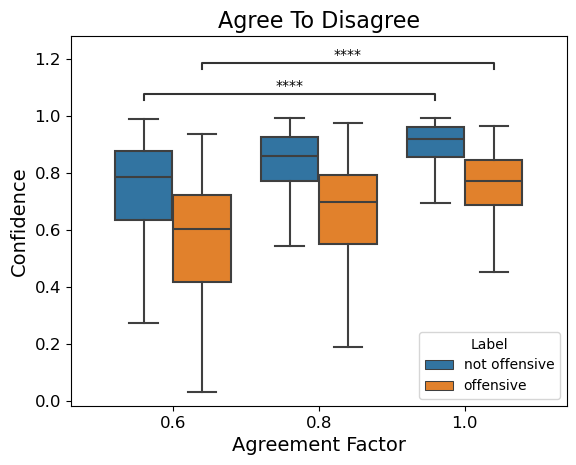

In [46]:
ax = sns.boxplot(data=cartography_df, x="agreement_factor", y="confidence", showfliers=False, hue='label_text')


pairs=[ ((0.6, 0), (1.0, 0)), ((0.6, 1), (1.0, 1))]


annotator = Annotator(ax, pairs, data=cartography_df, x="agreement_factor", y="confidence", hue='label')
annotator.configure(test='Mann-Whitney', text_format='star')
annotator.apply_and_annotate()

plt.title("Agree To Disagree", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title = 'Label')
plt.savefig("./plots/agr_factor_vs_conf_hue.png", dpi=600, bbox_inches='tight')

In [47]:
cartography_df['label'].value_counts()

0    4630
1    1962
Name: label, dtype: int64

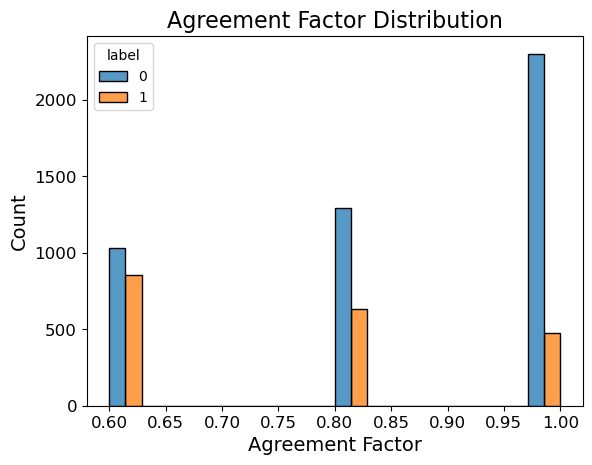

In [12]:
# sns.histplot(data=cartography_df, x="agreement_factor",hue='label')
sns.histplot(data=cartography_df, x="agreement_factor", hue='label', multiple='dodge')

plt.title("Agreement Factor Distribution", fontsize=16)
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/agr_factor_hist.png", dpi=600, bbox_inches='tight')

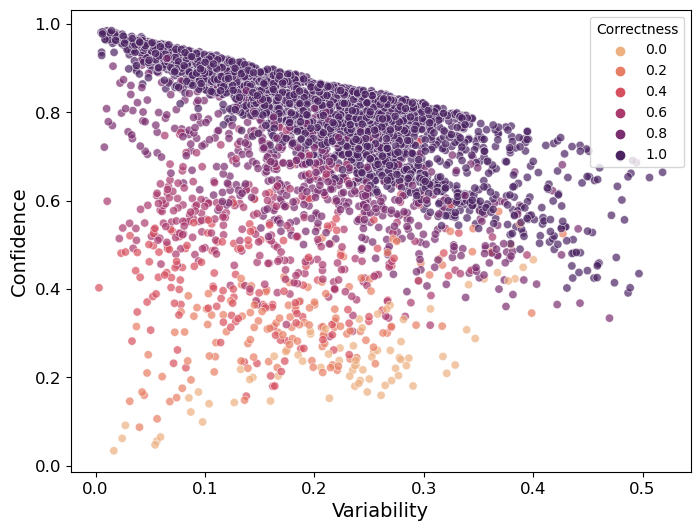

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_df, x="variability", y="confidence", hue='correctness', palette='flare', alpha=0.7)

plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Correctness', loc='upper right')
plt.savefig("./plots/conf_vs_var_color_correctness.png", dpi=600, bbox_inches='tight')

In [35]:
from scipy.stats import pearsonr

pearsonr(cartography_df['confidence'], cartography_df['agreement_factor_rd'])

PearsonRResult(statistic=0.38160578391819133, pvalue=3.0738806317854375e-136)

In [13]:
from sklearn.metrics import f1_score, classification_report

In [14]:
print(classification_report(cartography_df['label'], cartography_df['pred']))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4630
           1       0.88      0.87      0.88      1962

    accuracy                           0.93      6592
   macro avg       0.91      0.91      0.91      6592
weighted avg       0.93      0.93      0.93      6592



In [15]:
print(f1_score(cartography_df['label'], cartography_df['pred']))

0.8756066411238825
